In [1]:
%matplotlib inline

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression




In [2]:
train_path = os.path.join('..','data','all','train.csv')
test_path = os.path.join('..','data','all','test.csv')


In [3]:
train_df = pd.read_csv(train_path, parse_dates=["first_active_month"])
test_df = pd.read_csv(test_path, parse_dates=["first_active_month"])

In [4]:
train_df.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.159749


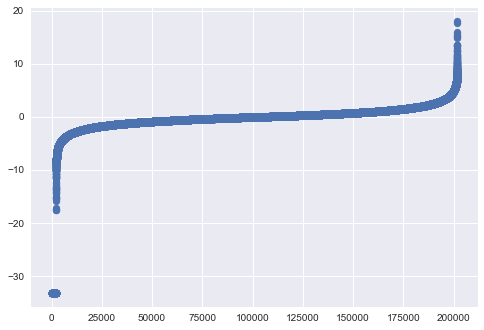

In [5]:
plt.scatter(range(train_df.shape[0]), np.sort(train_df['target'].values))

In [6]:
hist_trans_path= os.path.join('..','data','all','historical_transactions.csv')
hist_trans_df = pd.read_csv(hist_trans_path)

In [7]:
hist_trans_df.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [8]:
hist_temp = hist_trans_df.groupby("card_id")
hist_temp = hist_temp["purchase_amount"].size().reset_index()
hist_temp.columns = ["card_id", "num_hist_transactions"]
train_df = pd.merge(train_df, hist_temp, on="card_id", how="left")
test_df = pd.merge(test_df, hist_temp, on="card_id", how="left")

In [9]:
hist_temp = hist_trans_df.groupby("card_id") 
hist_temp = hist_temp["purchase_amount"].agg(['sum', 'mean', 'std', 'min', 'max']).reset_index()
hist_temp.columns = ["card_id", "sum_hist_trans", "mean_hist_trans", "std_hist_trans", "min_hist_trans", "max_hist_trans"]
train_df = pd.merge(train_df, hist_temp, on="card_id", how="left")
test_df = pd.merge(test_df, hist_temp, on="card_id", how="left")

In [ ]:
# bins = np.percentile(train_df["mean_hist_trans"], range(0,101,10))
# train_df['binned_mean_hist_trans'] = pd.cut(train_df['mean_hist_trans'], bins)
# #cnt_srs = train_df.groupby("binned_mean_hist_trans")[target_col].mean()

# plt.figure(figsize=(12,8))
# sns.boxplot(x="binned_mean_hist_trans", y="target", data=train_df, showfliers=False)
# plt.xticks(rotation='vertical')
# plt.xlabel('Binned Mean Historical Transactions', fontsize=12)
# plt.ylabel('Loyalty score', fontsize=12)
# plt.title("Mean of historical transaction value (Binned) distribution")
# plt.show()

In [10]:
new_trans_path = os.path.join('..','data','all','new_merchant_transactions.csv')
new_trans_df = pd.read_csv(new_trans_path)

In [11]:
hist_temp = new_trans_df.groupby("card_id")
hist_temp = hist_temp["purchase_amount"].size().reset_index()
hist_temp.columns = ["card_id", "num_merch_transactions"]
train_df = pd.merge(train_df, hist_temp, on="card_id", how="left")
test_df = pd.merge(test_df, hist_temp, on="card_id", how="left")

In [12]:
hist_temp = new_trans_df.groupby("card_id")
hist_temp = hist_temp["purchase_amount"].agg(['sum', 'mean', 'std', 'min', 'max']).reset_index()
hist_temp.columns = ["card_id", "sum_merch_trans", "mean_merch_trans", "std_merch_trans", "min_merch_trans", "max_merch_trans"]
train_df = pd.merge(train_df, hist_temp, on="card_id", how="left")
test_df = pd.merge(test_df, hist_temp, on="card_id", how="left")

In [13]:
train_df["year"] = train_df["first_active_month"].dt.year
test_df["year"] = test_df["first_active_month"].dt.year
train_df["month"] = train_df["first_active_month"].dt.month
test_df["month"] = test_df["first_active_month"].dt.month

In [14]:
model_cols = ["feature_1", "feature_2", "feature_3", "year", "month", 
               "num_hist_transactions", "sum_hist_trans", "mean_hist_trans", "std_hist_trans", 
               "min_hist_trans", "max_hist_trans",
               "num_merch_transactions", "sum_merch_trans", "mean_merch_trans", "std_merch_trans",
               "min_merch_trans", "max_merch_trans",
              ]

In [15]:
lm = LinearRegression()

In [16]:
train_x = train_df[model_cols]
train_x = train_x.fillna(0)
train_y = train_df['target'].values

In [17]:
lm.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
test_x = test_df[model_cols]
test_x = test_x.fillna(0)

In [23]:
test_pred = lm.predict(test_x)

In [24]:
submission = pd.DataFrame(test_pred)
submission.columns=['target']
submission = pd.concat([test_df['card_id'], submission], axis=1)
submission.to_csv('submission.csv', index=False)

In [25]:
np.shape(submission)

(123623, 2)